# Material de aula - Redes Neurais e Deep Learning

In [ ]:
#Neste versão o bias não é incluido dentro do vetor de pesos e os calculos são separados

## MLP e Aproximação de Funções - Laboratório 02

In [1]:
#CÉLULA MLP-LIB-01
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#CÉLULA MLP-LIB-02
def loadDataFile(filename) :
    '''
    Esta função faz o carregamento de dados de um arquivo separado por virgulas (csv)
    
    Parametros
    -----------
    filename -> nome do arquivo de dados em formato csv
    
    
    Retorno
    -----------  
    dataframe contendo os dados do arquivo formatados numericamente.
    '''
    
    dfFile = pd.read_csv(filename, sep=';', decimal=',', thousands='.')
    return dfFile

In [3]:
#CÉLULA MLP-LIB-03
def sigmoid(z) :
    '''
    Esta função faz o cálculo da função de ativação do tipo sigmoide
    
    Parametros
    -----------
    z -> valor do parametro a ser calculado em f(z)
    
    Retorno
    -----------  
    valor da função sigmoide correspondente ao parametro z
    '''
    return (1/(1+np.exp(-z)))

In [4]:
#CÉLULA MLP-LIB-04
def tanh_function(z) :
    '''
    Esta função faz o cálculo da função de ativação do tipo tangente hiperbolica
    
    Parametros
    -----------
    z -> valor do parametro a ser calculado em f(z)
    
    Retorno
    -----------  
    valor da função tangente hiperbolica correspondente ao parametro z
    '''
    return np.tanh(z)

In [5]:
#CÉLULA MLP-LIB-05
def forward_step(vInputs, vWeights, vBias) : 
    '''
    Processa o forward step
    
    Parametros
    -----------
    vInputs  -> vetor/matriz com as entradas
    vWeights -> vetor/matriz com os vetores de pesos (é um vetor de matrizes)
    vBias    -> vetor/matriz com os vetores de bias  (é um vetor de matrizes)
    
    Retorno
    -------
    Este método retorna uma tupla contendo a saída das camadas do MLP
    (Y_1, Y_2)
    '''
    
    W_1 = vWeights[0]
    W_2 = vWeights[1]
    
    B_1 = vBias[0]
    B_2 = vBias[1]
    
    #FORWARD STEP
    #Calcula saída do MLP para todas as amostras, de uma vez.
    Y_0 = vInputs #so para ficar uniforme a nomenclatura dos termos
    I_1 = W_1 @ Y_0 + B_1
    Y_1 = sigmoid(I_1) #Função sigmoide na camada oculta, g1

    I_2 = W_2 @ Y_1 + B_2
    Y_2 = I_2 #Função linear na camada de saida, g2
    #FIM DO FORWARD STEP
    
    return (Y_1, Y_2)

In [6]:
#CÉLULA MLP-LIB-06
def calcMSE(vInputs, vOutputs, vWeights, vBias) : 
    '''
    Calcula o Erro Quadratico Medio (Mean Squared Error) do MLP
    
    Parametros
    -----------
    vInputs  -> vetor/matriz com as entradas
    vOutputs -> vetor/matriz com os vetores dos dados
    vWeights -> vetor/matriz com os vetores de pesos (é um vetor de matrizes)
    vBias    -> vetor/matriz com os vetores de bias  (é um vetor de matrizes)
    
    Retorno
    -------
    Este método retorna o valor de MSE para o conjunto de dados e pesos do MLP
    '''
    
    (_, Y_2) = forward_step(vInputs, vWeights, vBias)
    nSamples = vInputs.shape[1]
       
    E_k = 1/2 * (vOutputs - Y_2)**2   
    MSE = np.sum(E_k, axis=1) / nSamples
    
    return np.asscalar(MSE)

# 1 - Implementação do algoritmo de Treinamento do MLP

Utilizando Jupyter e NumPy: para o problema apresentado, construa duas funções para o cálculo do treinamento do MLP: uma para treinamento ONLINE e outra para treinamento em BATCH.

## 1.1 - Implemente o código que realiza o treinamento em Batch

In [8]:
dfTrainData = loadDataFile('Lab01_training.csv')
dfTrainData

,Amostra,x1,x2,x3,d
0,1,0.8799,0.7998,0.3972,0.8399
1,2,0.5700,0.5111,0.2418,0.6258
2,3,0.6796,0.4117,0.3370,0.6622
3,4,0.3567,0.2967,0.6037,0.5969
4,5,0.3866,0.8390,0.0232,0.5316
5,6,0.0271,0.7788,0.7445,0.6335
6,7,0.8174,0.8422,0.3229,0.8068
7,8,0.6027,0.1468,0.3759,0.5342
8,9,0.1203,0.3260,0.5419,0.4768
9,10,0.1325,0.2082,0.4934,0.4105


In [15]:
#CÉLULA MLP-LIB-07
def mlp_train_batch(eta, epsilon, vInputs, vOutputs, dictLayers, max_epochs) :
    '''
    Algoritmo de treinamento da Rede MLP
    
    Parametros
    -----------
    eta         -> taxa de aprendizado
    epsilon     -> margem de erro
    vInputs     -> vetor/matriz com as entradas
    vOutputs    -> vetor/matriz com as saidas
    dictLayers  -> dicionario que descreve as camadas da rede {'nLayers' : 'xxx', vLayers : vvv}, onde nLayers representa 
                   o numero de camadas e vLayers é um vetor linha contedo o tamanho de cada camada
    max_epochs -> criterio de parada por epocas de treinamento
    
    Retorno
    -------
    Este método retorna uma tupla contendo o vetor de pesos ajustado e o numero de epocas executadas no treinamento.
    '''
        
    #Determine numero de entradas do MLP e o numero de amostras        
    nInputs  = vInputs.shape[0]
    nSamples = vInputs.shape[1]
    
    indexLayer = 1
    nNeurons     = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'
    
    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    
    #IMPLEMENTE O CÓDIGO AQUI - INICIO
    ## INICIALIZE O VETOR DE PESOS E BIAS (W_1 E B_1)    
    W_1 = np.random.rand(nNeurons, nConnections) 
    B_1 = np.random.rand(nNeurons, 1) 
    #IMPLEMENTE O CÓDIGO AQUI - FIM
    
    indexLayer = 2
    nNeurons     = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'

    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    
    #IMPLEMENTE O CÓDIGO AQUI - INICIO
    ## INICIALIZE O VETOR DE PESOS E BIAS (W_2 E B_2) - NOTA: PARA APROXIMAÇÃO DE FUNÇÕES NAO USAMOS BIAS NA CAMADA DE SAÍDA
    W_2 = np.random.rand(nNeurons, nConnections) 
    B_2 = 0 #para aproximação de funções, não se usa bias na camada de saída
    #IMPLEMENTE O CÓDIGO AQUI - FIM
        
    #Monte o loop de cálculo do erro e ajuste dos pesos
    bError = True
    MSE = [] # MSE: Mean Squared Error    
    
    for epochCounter in range(max_epochs) :
        #FORWARD STEP
        #Calcula saída do MLP para todas as amostras, de uma vez.
        
        #IMPLEMENTE O CÓDIGO AQUI - INICIO
        (Y_1, Y_2) = forward_step(vInputs, [W_1, W_2], [B_1, B_2])
        ###CALCULE O FORWARD STEP        

        #IMPLEMENTE O CÓDIGO AQUI - FIM
        Y_0 = vInputs # só para padronizar
        #INICIO - BACKWARD STEP g1 = sigmoid e a g2 = x   / derivadas: g1 = Y_1 * (1 - Y_N) e g2 = 1
        #A derivada de g2 é igual a 1
        #Ajuste de pesos Camada Oculta - Camada de Saída        
        #IMPLEMENTE O CÓDIGO AQUI - INICIO
        ###DEFINA A DERIVADA E O GRADIENTE LOCAL DA CAMADA DE SAIDA
        diff_g2 = 1
        delta_2 = (vOutputs - (Y_2)) * diff_g2
        #IMPLEMENTE O CÓDIGO AQUI - FIM
        
        #Ajuste dos pesos
        #IMPLEMENTE O CÓDIGO AQUI - INICIO
        ###AJUSTE OS VALORES DE W_2 E B_2
        W_2 += eta * delta_2 @ Y_1.T 
        B_2 = 0
        #IMPLEMENTE O CÓDIGO AQUI - FIM

        #Ajuste de pesos Camada Entrada - Camada Oculta
        #A derivada de g1(I_1) é igual a g1(I_1)*(1 - g1(I_1)) ou seja, Y_1*(1 - Y_1)
        #IMPLEMENTE O CÓDIGO AQUI - INICIO
        ###DEFINA A DERIVADA E O GRADIENTE LOCAL DA CAMADA OCULTA
        diff_g1 = Y_1  * (1 - Y_1)
        delta_1 = (W_2.T @ delta_2) * diff_g1
        #IMPLEMENTE O CÓDIGO AQUI - FIM
        
        #Ajuste dos pesos
        #IMPLEMENTE O CÓDIGO AQUI - INICIO
        ###AJUSTE OS VALORES DE W_1 E B_1
        W_1 += eta * delta_1 @ Y_0.T 
        B_1 += eta * np.sum(delta_1, axis = 1, keepdims = True)
        
        #FIM - BACKWARD STEP
        #IMPLEMENTE O CÓDIGO AQUI - FIM

        #Calcula o Erro Quadratico Medio
        MSE_temp = calcMSE(vInputs, vOutputs, [W_1, W_2], [B_1, B_2])
        MSE.append( MSE_temp )
                
        print( 'Epoch = {} - MSE = {}'.format(epochCounter, MSE_temp))

        if( epochCounter > 0 and abs(MSE[epochCounter] - MSE[epochCounter-1]) < epsilon ) :
            break 
    
    return (W_1, W_2, B_1, B_2, MSE)

## 1.2 - Implemente o código que realiza o treinamento ONLINE

In [22]:
#CÉLULA MLP-LIB-07
def mlp_train_online(eta, epsilon, vInputs, vOutputs, dictLayers, max_epochs) :
    '''
    Algoritmo de treinamento do Perceptron Simples
    
    Parametros
    -----------
    eta         -> taxa de aprendizado
    epsilon     -> margem de erro
    vInputs     -> vetor/matriz com as entradas
    vOutputs    -> vetor/matriz com as saidas
    dictLayers  -> dicionario que descreve as camadas da rede {'nLayers' : 'xxx', vLayers : vvv}, onde nLayers representa 
                   o numero de camadas e vLayers é um vetor linha contedo o tamanho de cada camada
    max_epochs -> criterio de parada por epocas de treinamento
    
    Retorno
    -------
    Este método retorna uma tupla contendo o vetor de pesos ajustado e o numero de epocas executadas no treinamento.
    '''
    
    #IMPLEMENTE O CÓDIGO AQUI
    #DICA: FAÇA FUNCIONAR O TREINAMENTO PARA O MODO BATCH, COPIE E COLE O CODIGO AQUI PARA MODIFICAR PARA ONLINE
    
    #Determine numero de entradas do MLP e o numero de amostras        
    nInputs  = vInputs.shape[0]
    nSamples = vInputs.shape[1]
    
    indexLayer = 1
    nNeurons     = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'
    
    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    
    #IMPLEMENTE O CÓDIGO AQUI - INICIO
    ## INICIALIZE O VETOR DE PESOS E BIAS (W_1 E B_1)    
    W_1 = np.random.rand(nNeurons, nConnections) 
    B_1 = np.random.rand(nNeurons, 1) 
    #IMPLEMENTE O CÓDIGO AQUI - FIM
    
    indexLayer = 2
    nNeurons     = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'

    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    
    #IMPLEMENTE O CÓDIGO AQUI - INICIO
    ## INICIALIZE O VETOR DE PESOS E BIAS (W_2 E B_2) - NOTA: PARA APROXIMAÇÃO DE FUNÇÕES NAO USAMOS BIAS NA CAMADA DE SAÍDA
    W_2 = np.random.rand(nNeurons, nConnections) 
    B_2 = 0 #para aproximação de funções, não se usa bias na camada de saída
    #IMPLEMENTE O CÓDIGO AQUI - FIM
        
    #Monte o loop de cálculo do erro e ajuste dos pesos
    bError = True
    MSE = [] # MSE: Mean Squared Error    
    
    for epochCounter in range(max_epochs) :
        for k in range(nSamples) : 
            
        #FORWARD STEP
        #Calcula saída do MLP para todas as amostras, de uma vez.
        
        #IMPLEMENTE O CÓDIGO AQUI - INICIO
            Y_0 = vInputs[:,[k]] # pega somente a amostra k
            (Y_1, Y_2) = forward_step(Y_0, [W_1, W_2], [B_1, B_2])
            ###CALCULE O FORWARD STEP        

            #IMPLEMENTE O CÓDIGO AQUI - FIM        
            #INICIO - BACKWARD STEP g1 = sigmoid e a g2 = x   / derivadas: g1 = Y_1 * (1 - Y_N) e g2 = 1
            #A derivada de g2 é igual a 1
            #Ajuste de pesos Camada Oculta - Camada de Saída        
            #IMPLEMENTE O CÓDIGO AQUI - INICIO
            ###DEFINA A DERIVADA E O GRADIENTE LOCAL DA CAMADA DE SAIDA
            diff_g2 = 1
            Y_d = vOutputs[:, [k]]
            delta_2 = (Y_d - Y_2) * diff_g2
            #IMPLEMENTE O CÓDIGO AQUI - FIM

            #Ajuste dos pesos
            #IMPLEMENTE O CÓDIGO AQUI - INICIO
            ###AJUSTE OS VALORES DE W_2 E B_2
            W_2 += eta * delta_2 @ Y_1.T 
            B_2 = 0
            #IMPLEMENTE O CÓDIGO AQUI - FIM

            #Ajuste de pesos Camada Entrada - Camada Oculta
            #A derivada de g1(I_1) é igual a g1(I_1)*(1 - g1(I_1)) ou seja, Y_1*(1 - Y_1)
            #IMPLEMENTE O CÓDIGO AQUI - INICIO
            ###DEFINA A DERIVADA E O GRADIENTE LOCAL DA CAMADA OCULTA
            diff_g1 = Y_1  * (1 - Y_1)
            delta_1 = (W_2.T @ delta_2) * diff_g1
            #IMPLEMENTE O CÓDIGO AQUI - FIM

            #Ajuste dos pesos
            #IMPLEMENTE O CÓDIGO AQUI - INICIO
            ###AJUSTE OS VALORES DE W_1 E B_1
            W_1 += eta * delta_1 @ Y_0.T 
            B_1 += eta * np.sum(delta_1, axis = 1, keepdims = True)

            #FIM - BACKWARD STEP
            #IMPLEMENTE O CÓDIGO AQUI - FIM

        #Calcula o Erro Quadratico Medio
        MSE_temp = calcMSE(vInputs, vOutputs, [W_1, W_2], [B_1, B_2])
        MSE.append( MSE_temp )
                
        print( 'Epoch = {} - MSE = {}'.format(epochCounter, MSE_temp))

        if( epochCounter > 0 and abs(MSE[epochCounter] - MSE[epochCounter-1]) < epsilon ) :
            break 
    
    return (W_1, W_2, B_1, B_2, MSE)

# 2 - Implementação do algoritmo de Operação do MLP

## 2.1 - Implemente o código que realiza a operação do MLP

In [10]:
#CÉLULA MLP-LIB-08
def mlp_operation(vInputs, vWeights, vBias) :
    '''
    Algoritmo de operação do MLP
    
    Parametros
    -----------
    vInputs  -> vetor/matriz com as entradas
    vOutputs -> vetor/matriz com as saidas
    vWeights -> vetor/matriz com os vetores de pesos (é um vetor de matrizes)
    vBias    -> vetor/matriz com os vetores de bias  (é um vetor de matrizes)
    
    Retorno
    -------
    Este método retorna o valor de saída do MLP
    '''
    
    #IMPLEMENTE O CÓDIGO AQUI
    (_, Y_2) = forward_step(vInputs, vWeights, vBias)
    return (Y_2)

# 3 - Implementação e testes do modelo da Rede MLP

### Para a confecção de um sistema de ressonância magnética, observou-se que é de extrema importância para o bom desempenho do processador de imagens de que a variável {y}, que mede a energia absorvida do sistema, possa ser estimada a partir da medição de três outras grandezas {x1 , x2 , x3}. 

### Entretanto, em função da complexidade do sistema, sabe-se que este mapeamento é de difícil obtenção por técnicas convencionais, sendo que o modelo matemático disponível para representação do mesmo não fornece resultados satisfatórios.

### Assim, a equipe de engenheiros e cientistas pretende utilizar uma rede perceptron multicamadas como um aproximador universal de funções, tendo-se como objetivo final de que, dado como entrada os valores de {x1 , x2 , x3}, a mesma possa estimar (após o treinamento) o respectivo valor da variável {y} que representa a energia absorvida. 

### A topologia da rede perceptron constituída de duas camadas neurais está ilustrada na figura abaixo

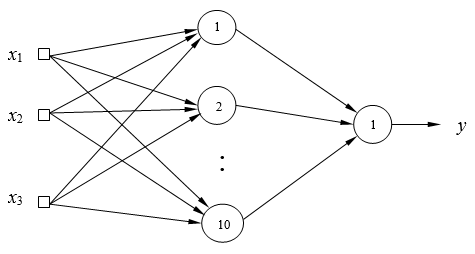


*Fonte*:  SILVA, I.N. – Sistemas Inteligentes – Notas de Aula da disciplina **Redes Neurais Artificiais** – USP São Carlos, 2012

### Utilizando o algoritmo de aprendizagem backpropagation (Regra Delta Generalizada) e os dados de treinamento apresentados no Anexo, sendo que as variáveis de entrada {x1 , x2 , x3} já estão todas normalizadas, realize as seguintes atividades:

## MLP - inicio

# 3.1 - Configuração dos hiperparâmetros

In [23]:
#CÉLULA MLP-MAIN-01
#IMPLEMENTE O CÓDIGO AQUI - INICIO
#Parâmetros
eta        = 0.1
epsilon    = 0.000001 
nInputs    = 3
nHidden    = 10
nOutputs   = 1
max_epochs = 2000  
dictLayers = {'nLayers' : 2, 'vLayers' : np.array([nInputs,nHidden, nOutputs])}

# 3.2 - Carga dos dados e execução do treinamento

In [35]:
#CÉLULA MLP-MAIN-02

#IMPLEMENTE O CÓDIGO AQUI - INICIO
# 1 - FAÇA O CARREGAMENTO DOS DADOS
# 2 - SEPARE EM DOIS VETORES DE DADOS: ENTRADAS E SAIDAS
# 3 - EXECUTE O TREINAMENTO E VERIFIQUE A CONVERGÊNCIA
#1
dfTrainingFile = loadDataFile('Lab01_training.csv')
nSamples = len(dfTrainingFile['x1'])

#2
vInputs = np.array(dfTrainingFile[['x1', 'x2', 'x3']])
vOutputs = np.array(dfTrainingFile['d'].values.reshape(nSamples, 1))

#3
(W_1, W_2, B_1, B_2, MSE) = mlp_train_online(eta, epsilon,vInputs.T, vOutputs.T, dictLayers, max_epochs)
print(W_1)
print('-----------')
print(W_2)

Epoch = 0 - MSE = 0.009060026637702204
Epoch = 1 - MSE = 0.007203916428660521
Epoch = 2 - MSE = 0.005636597665194082
Epoch = 3 - MSE = 0.004314173233814088
Epoch = 4 - MSE = 0.003231303188659113
Epoch = 5 - MSE = 0.0023865753147931297
Epoch = 6 - MSE = 0.0017651574960792682
Epoch = 7 - MSE = 0.001335853446681213
Epoch = 8 - MSE = 0.0010575451082095349
Epoch = 9 - MSE = 0.0008882882931547826
Epoch = 10 - MSE = 0.0007920621718835845
Epoch = 11 - MSE = 0.0007415850235948492
Epoch = 12 - MSE = 0.0007180711075122387
Epoch = 13 - MSE = 0.00070950924032131
Epoch = 14 - MSE = 0.0007086667641927042
[[ 0.64318391  0.92710055  0.58733238]
 [ 0.74787374  0.10702191  0.52709258]
 [ 0.40509594  0.46607837  0.93619581]
 [ 0.56746364  0.24516511  0.54298609]
 [ 0.64521411  0.58423112  0.88332967]
 [ 0.84598708  0.6931097   0.1080094 ]
 [-0.09084454  0.08636385  0.0123205 ]
 [ 0.5191368   0.0904608   0.27168879]
 [ 0.88166762  0.76728711  0.92371423]
 [ 1.06476317  0.64900313  0.63987133]]
-----------


# 3.3 - Verificação dos resultados do treinamento

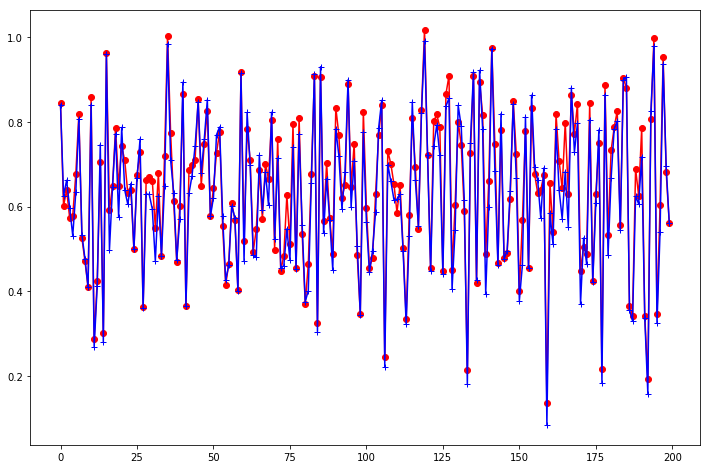

In [36]:
#Verifica resultados 
#IMPLEMENTE O CÓDIGO AQUI - INICIO
# EXECUTE A OPERAÇÃO COM OS DADOS DE TREINAMENTO E VERIFIQUE O RESULTADO 
#PLOTANDO UM GRÁFICO ENTRE OS DADOS DE PREDIÇÃO VERSUS OS DADOS ESPERADOS

y_pred = mlp_operation(vInputs.T, [W_1, W_2], [B_1, B_2])
plt.figure(figsize=(12,8))

y_pred = y_pred.T

plt.plot(range(len(y_pred)), y_pred, 'ro-')
plt.plot(range(len(vOutputs)), vOutputs, 'b+-')

# 3.4 - Carga dos dados e execução da verificação

[[0.50821782 0.61105766 0.55238238 0.71639782 0.29826425 0.76617805
  0.58551669 0.68868592 0.55394418 0.61544821 0.70139649 0.68501342
  0.31255959 0.79966773 0.4881415  0.84696969 0.79712191 0.61168731
  0.81804283 0.51726349]]
---------
[[0.4831 0.5965 0.5318 0.6843 0.2872 0.7663 0.5666 0.6601 0.5427 0.5836
  0.695  0.679  0.2956 0.7742 0.4662 0.8093 0.7581 0.5826 0.7938 0.5012]]


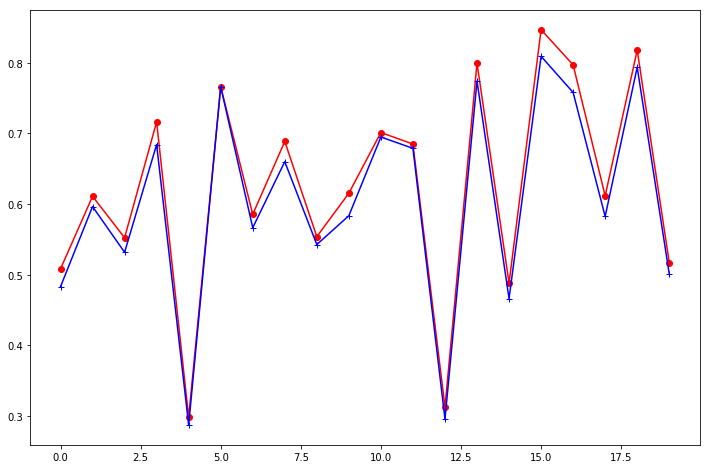

In [39]:
#Carrega dados - Teste
#IMPLEMENTE O CÓDIGO AQUI - INICIO
# 1 - FAÇA O CARREGAMENTO DOS DADOS DE TESTE
# 2 - SEPARE EM DOIS VETORES DE DADOS: ENTRADAS E SAIDAS
# 3 - EXECUTE A OPERAÇÃO E VERIFIQUE O RESULTADO PLOTANDO UM GRÁFICO ENTRE OS DADOS DE PREDIÇÃO VERSUS OS DADOS ESPERADOS

dfTestFile = loadDataFile('Lab01_operation.csv')

nSamples = len(dfTestFile['x1'])

vInputs = np.array(dfTestFile[['x1', 'x2', 'x3']])
vOutputs = np.array(dfTestFile['d'].values.reshape(nSamples, 1))

y_pred = mlp_operation(vInputs.T, [W_1, W_2], [B_1, B_2])

print(y_pred)
print('---------')
print(vOutputs.T)
plt.figure(figsize=(12,8))

y_pred = y_pred.T

plt.plot(range(len(y_pred)), y_pred, 'ro-')
plt.plot(range(len(vOutputs)), vOutputs, 'b+-')
